## UMAP + K-Means

In [1]:
import pandas as pd
import numpy as np

### Read datasets

In [2]:
df_help_center = pd.read_parquet("FT_SEARCH_TERMS.parquet")
df_help_center.shape

(85410, 4)

In [3]:
df_ipc = pd.read_parquet("IPC_SEARCH_QUERY_TERMS.parquet")
df_ipc.shape

(16127, 8)

In [4]:
df_google = pd.read_parquet("PERFORMANCE_REPORT_CUSTOM.parquet")
df_google.shape

(1430248, 3)

### 1- Talend Help Center : User queries + embedding

In [5]:
thc_embedd = pd.read_parquet('./queries_unique_embeddings/talend_HC_unique_queries_embedding.parquet')
thc_embedd

,QUERY_TERMS,embedding
0,management console,"[-0.004322341693185566, -0.030163845395668177,..."
1,talend cloud data catalog administration guide,"[-0.012687883335647096, -0.0081912912401424, -..."
2,authentication protocols,"[-0.005785695361989555, -0.0050168676106133, 0..."
3,data catalog,"[-0.01183576152363635, -0.011971230765135885, ..."
4,logging in to the studio,"[-0.006270805165635671, -0.025466070624882403,..."
...,...,...
38487,tmap type length precision,"[-0.009533870630991807, 0.01000067370341025, 0..."
38488,create a job that illustrates the process of e...,"[-0.03291688505120821, -0.01156285132150887, -..."
38489,data base connecton,"[-0.027216859308402265, 0.0012151657203450083,..."
38490,selecting and configuring the database,"[0.001809233214592607, 0.004131455433434716, 0..."


In [6]:
df_help_center['LANGUAGE'].value_counts()

en-US    77574
fr-FR     4506
ja-JP     2555
de-DE      389
zh-CN      386
Name: LANGUAGE, dtype: int64

##### Only for English queries :

In [7]:
df = df_help_center[df_help_center['LANGUAGE']=='en-US']
df2 = pd.DataFrame(df["QUERY_TERMS"].unique(), columns=['QUERY_TERMS'])
df2

,QUERY_TERMS
0,management console
1,talend cloud data catalog administration guide
2,authentication protocols
3,data catalog
4,logging in to the studio
...,...
35439,tmap type length precision
35440,create a job that illustrates the process of e...
35441,data base connecton
35442,selecting and configuring the database


In [8]:
thc_en = pd.merge(thc_embedd, df2, on='QUERY_TERMS', how='inner')
thc_en

,QUERY_TERMS,embedding
0,management console,"[-0.004322341693185566, -0.030163845395668177,..."
1,talend cloud data catalog administration guide,"[-0.012687883335647096, -0.0081912912401424, -..."
2,authentication protocols,"[-0.005785695361989555, -0.0050168676106133, 0..."
3,data catalog,"[-0.01183576152363635, -0.011971230765135885, ..."
4,logging in to the studio,"[-0.006270805165635671, -0.025466070624882403,..."
...,...,...
35439,tmap type length precision,"[-0.009533870630991807, 0.01000067370341025, 0..."
35440,create a job that illustrates the process of e...,"[-0.03291688505120821, -0.01156285132150887, -..."
35441,data base connecton,"[-0.027216859308402265, 0.0012151657203450083,..."
35442,selecting and configuring the database,"[0.001809233214592607, 0.004131455433434716, 0..."


### 2- Google : User queries + embedding

In [9]:
google_embedd = pd.read_parquet('./queries_unique_embeddings/google_queries_unique_embeddings.parquet')
google_embedd

,QUERY,embedding
0,talend sap,"[-0.011422375105710116, -0.0332235988715449, 0..."
1,sap talend,"[-0.006255174100263367, -0.02995636335497445, ..."
2,tflowtoiterate talend,"[-0.04371899229381361, -0.026086970706513456, ..."
3,talend tftpfilelist,"[-0.020819874876695583, -0.02204194323452131, ..."
4,talend java version,"[0.0006890799722034253, -0.036536014890475504,..."
...,...,...
11469,remove duplicates in ssis,"[-0.005339802104102244, 0.005379091811963196, ..."
11470,telecharger talend open studio for data integr...,"[-0.010846117369653428, -0.044624830944309524,..."
11471,excel afficher date du jour,"[-0.03160782917011587, -0.004686912076193646, ..."
11472,java home windows,"[-0.008222157815992939, -0.022413921789728477,..."


### 3-IPC: User queries + embedding

In [10]:
ipc_embedd = pd.read_parquet('./queries_unique_embeddings/ipc_queries_unique_embeddings.parquet')
ipc_embedd

,INPUT_VALUES_SEARCH_QUERY,embedding
1,delete account,"[-0.03002667820875631, -0.015312518101690856, ..."
2,convert bulk to ReST,"[-0.006475940047170754, 0.013213157973951499, ..."
3,fetch license file,"[-0.0019105491550711702, 0.001966318614425126,..."
4,cannot find task version from database,"[-0.02670016570154868, -0.008580103104015208, ..."
5,character encoding,"[-0.011962658253795, 0.0005135878070066096, 0...."
...,...,...
7339,how to convert talend studio into talend cloud,"[-0.010953764802413989, -0.022288785140119494,..."
7340,IP Whitelist,"[-0.006736527387763341, -0.019494728320854058,..."
7341,full,"[-0.004613058159430843, -0.011234858964527344,..."
7342,how to conect talend studio whit talend cloud,"[-0.02093189858074042, -0.02974008631428586, 0..."


## Dimensionality reduction + Clustering:

1- UMAP(2D)

2- K-MEANS ( K=5)

#### 1 - Talend help center

In [11]:
matrix_thc = np.vstack(thc_en.embedding.values)
type(matrix_thc)

numpy.ndarray

In [12]:
import umap

umap_reducer = umap.UMAP(n_components=3)
thc_embedding_3d = umap_reducer.fit_transform(matrix_thc)

C:\Users\ehilmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(thc_embedding_3d)
labels = kmeans.labels_
thc_en["Cluster"] = labels


C:\Users\ehilmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
for i in range(n_clusters):
    df = thc_en[thc_en["Cluster"]==i]
    print(f"################## Cluster {i} ##################")
    examples = df["QUERY_TERMS"].sample(10).tolist()
    for example in examples:
        print(example)
    print("\n")

################## Cluster 0 ##################
static analyze
naming rule
data governance policies
tmatcher
for details about logging in
"structure changes"
embarked
journalising
how to add an update-based notification
unc path


################## Cluster 1 ##################
supported system
poms
browser compatible
promote task plan to workspace
cvm
installation and configuration guide
remote engine ram
pari remote engine
test branche
config update repo


################## Cluster 2 ##################
tloop while
on the recommended messaging systems
converting rows to a json array
tdatamasking standard properties
tdp cluster
in the following procedure, the mongodb server module, the apache kafka module, and other
toiterate
big data user guide
uat dev qa
"kpi"


################## Cluster 3 ##################
what's a talend component
talend studio .ini
"talend components"
talend real-time big data platform studio user guide
metaservlet generic return codes
talend emr
using external

scatter plot of the first two components:

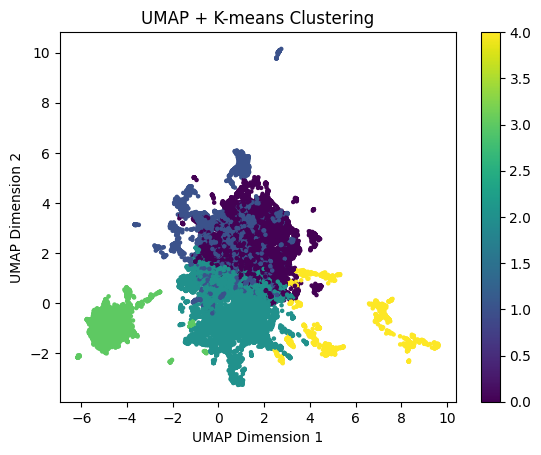

In [15]:
import matplotlib.pyplot as plt
plt.scatter(thc_embedding_3d[:, 0], thc_embedding_3d[:, 1], c=thc_en["Cluster"], cmap='viridis', s=5)
plt.title("UMAP + K-means Clustering")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar()
plt.show()

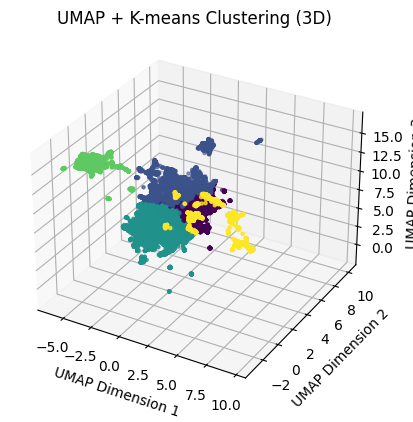

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(thc_embedding_3d[:, 0], thc_embedding_3d[:, 1], thc_embedding_3d[:, 2], c=thc_en["Cluster"], cmap='viridis', s=5)

ax.set_title("UMAP + K-means Clustering (3D)")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")
plt.show()


#### 2- Google search

In [17]:
matrix_gg = np.vstack(google_embedd.embedding.values)
type(matrix_gg)

numpy.ndarray

In [18]:
from sklearn.decomposition import PCA

umap_reducer = umap.UMAP(n_components=3)
gg_embedding_3d = umap_reducer.fit_transform(matrix_gg)

In [19]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(gg_embedding_3d)
labels = kmeans.labels_
google_embedd["Cluster"] = labels


C:\Users\ehilmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
for i in range(n_clusters):
    df = google_embedd[google_embedd["Cluster"]==i]
    print(f"################## Cluster {i} ##################")
    examples = df["QUERY"].sample(10).tolist()
    for example in examples:
        print(example)
    print("\n")

################## Cluster 0 ##################
talend unzip
talend 7.4
talend twebserviceinput
talend group
talend open studio mac
talend on component error
talend log4j security
log4j level talend
talend jenkins
talend change workspace location


################## Cluster 1 ##################
cookie サードパーティ 許可
docker change dns
export java_home=
7zip windows installer
zulu java_home
create workspace in vscode
blueprint osgi
apache windows インストール
git delete branch locally only
java cryptography extension maven


################## Cluster 2 ##################
date format yyy
spanish date format
ddmmmyyyy
[h]:mm:ss
dd/mm/yy
time format
date format yyyy-mm-dd hhmmss
how do europeans write the date
example of mm/dd/yyyy
yyyy-mm-ddthh:mm:ss+hh:mm


################## Cluster 3 ##################
reusable components in angular
tssh in talend
tfilter in talend
talend tlogrow output to file
ftp server directory
talend context
talend substring in tmap
talend tfixedflowinput example
talend ha

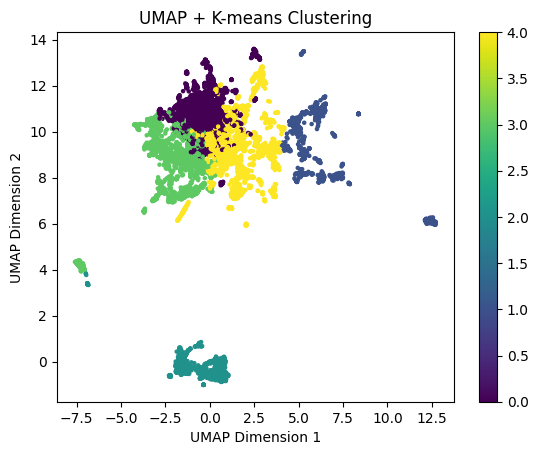

In [21]:
import matplotlib.pyplot as plt
plt.scatter(gg_embedding_3d[:, 0], gg_embedding_3d[:, 1], c=google_embedd["Cluster"], cmap='viridis', s=5)
plt.title("UMAP + K-means Clustering")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar()
plt.show()

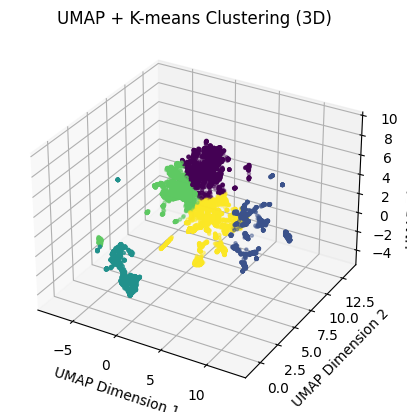

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gg_embedding_3d[:, 0], gg_embedding_3d[:, 1], gg_embedding_3d[:, 2], c=google_embedd["Cluster"], cmap='viridis', s=5)

ax.set_title("UMAP + K-means Clustering (3D)")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")
plt.show()


#### 3- IPC

In [23]:
matrix_ipc = np.vstack(ipc_embedd.embedding.values)
type(matrix_ipc)

numpy.ndarray

In [24]:
from sklearn.decomposition import PCA

umap_reducer = umap.UMAP(n_components=3)
ipc_embedding_3d = umap_reducer.fit_transform(matrix_ipc)

In [25]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(ipc_embedding_3d)
labels = kmeans.labels_
ipc_embedd["Cluster"] = labels


C:\Users\ehilmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
for i in range(n_clusters):
    df = ipc_embedd[ipc_embedd["Cluster"]==i]
    print(f"################## Cluster {i} ##################")
    examples = df["INPUT_VALUES_SEARCH_QUERY"].sample(10).tolist()
    for example in examples:
        print(example)
    print("\n")

################## Cluster 0 ##################
darkmode
customer io
invoice payment
extend trial
temp plan change
race condition
pair
trim string
to get start
licence renrewal


################## Cluster 1 ##################
Violation of PRIMARY KEY constraint
we have 2 jobs running for more than 2 hrs but it is not showing any session in Database . Need your help to understand the flow of application to Database
Hi I'm in middle of a trial and noticed an issue with some duplicate data in one of my tables
Data discrepancy
Extract errors
keeps updateing
no load
null values in double
Backfilling Existing Rows
oracle to oracle replicattion


################## Cluster 2 ##################
check connection
query all
tuto
how to test api
Dynamic module
Adding certificates
Oracle integration
fedramp
[accumulator] com.stitchdata.target-stitch-avro.accumulator-thread - accumulator thread is dying -
Microservice path


################## Cluster 3 ##################
GitHub
subscriptions page 

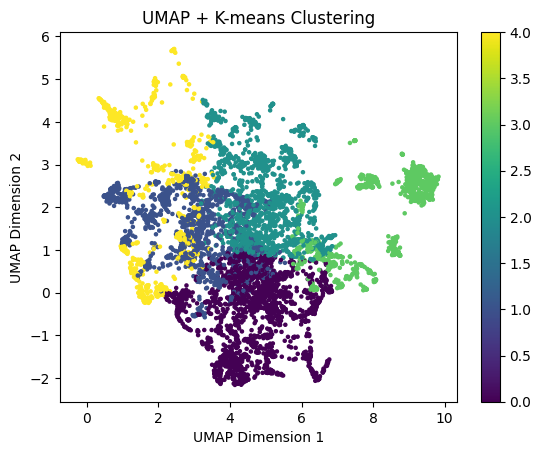

In [27]:
import matplotlib.pyplot as plt
plt.scatter(ipc_embedding_3d[:, 0], ipc_embedding_3d[:, 1], c=ipc_embedd["Cluster"], cmap='viridis', s=5)
plt.title("UMAP + K-means Clustering")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar()
plt.show()

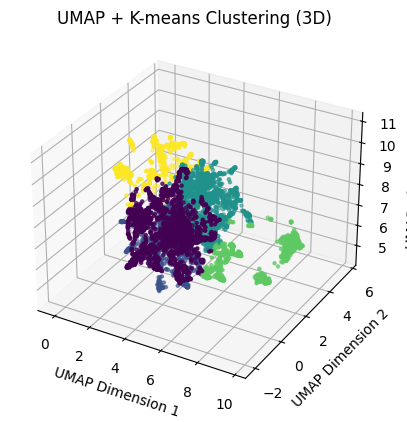

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ipc_embedding_3d[:, 0], ipc_embedding_3d[:, 1], ipc_embedding_3d[:, 2], c=ipc_embedd["Cluster"], cmap='viridis', s=5)

ax.set_title("UMAP + K-means Clustering (3D)")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")
plt.show()
